In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
def SHOW(img):
    display(Image.fromarray(img));
def nothing(x):
    pass

In [4]:
img = cv2.imread('carkyo.jpg', 0)

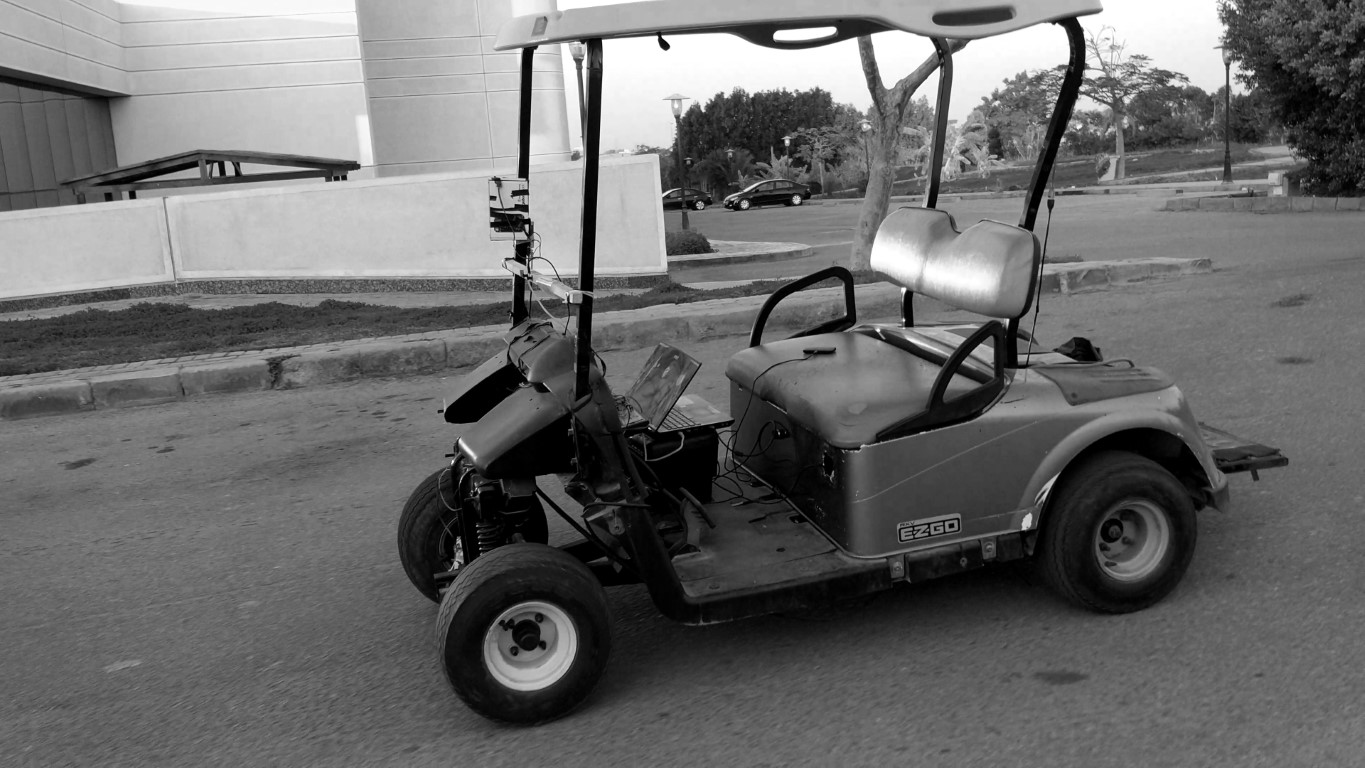

In [5]:
SHOW(img)

In [6]:
hist ,bins =np.histogram(img.flatten(),256,[0,255])

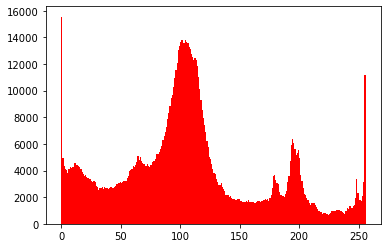

In [7]:
plt.hist(img.flatten(),256,[0,256],color='r');

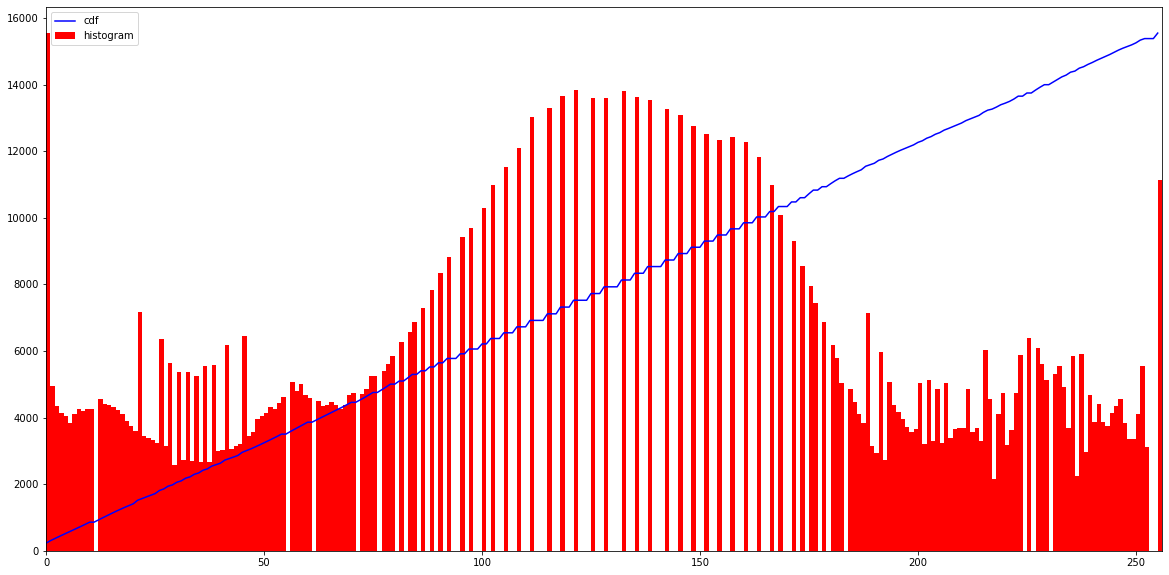

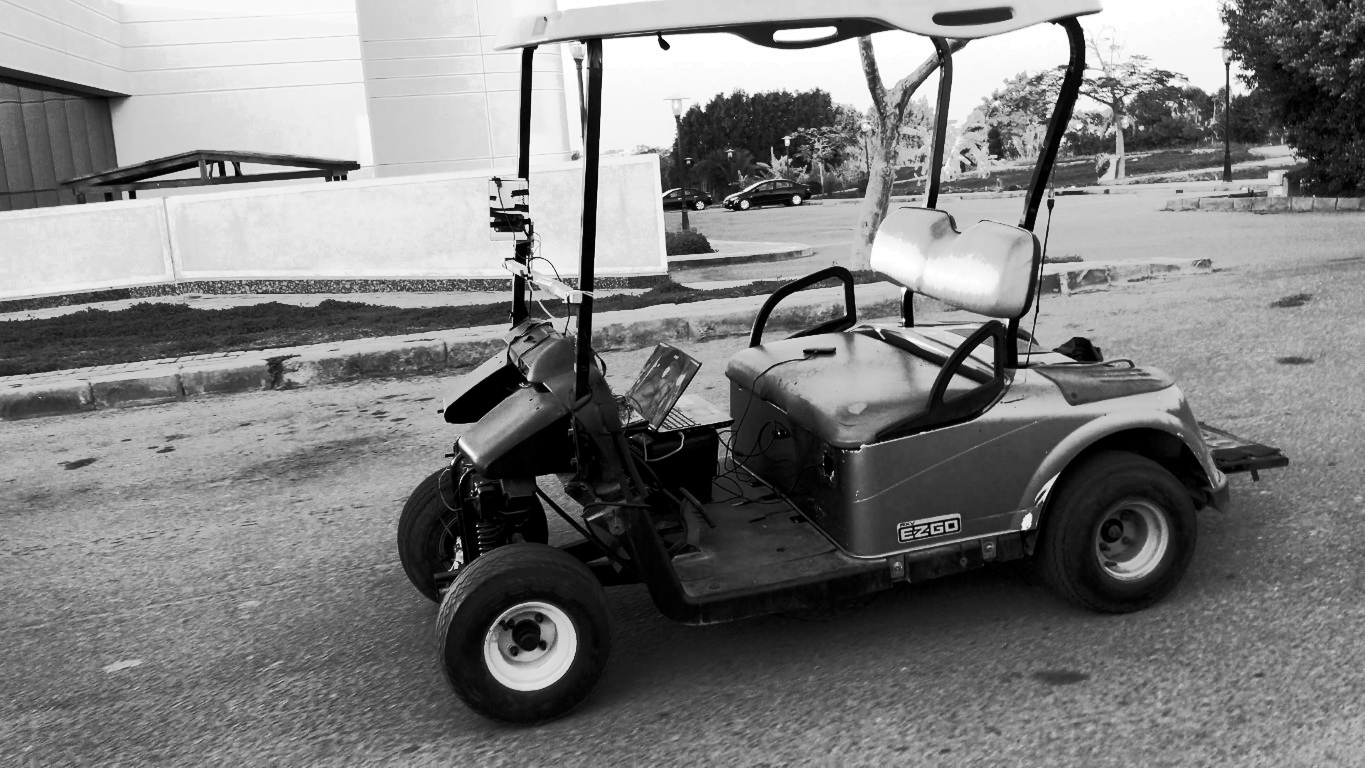

In [17]:
histeq = cv2.equalizeHist(img)
hist,bins = np.histogram(histeq.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(20, 10))
plt.plot(cdf_normalized, color = 'b')
plt.hist(histeq.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
SHOW(histeq)

# Histogram Equalization

In this lab you need to explore `CLAHE` and explain it.


## Your task

- What it 'CLAHE'?
- How it is compared to what we disscused in the lecture?
- Apply it to Grayscaled and Colored carkyo image and compare to our results.

## The answer


- CLAHE is Contast Limited Adaptive Histogram Eqalization 
-  CLAHE operates on small regions in the image, called tiles, rather than        the entire image. The neighboring tiles are then combined using bilinear      interpolation to remove the artificial boundaries.
-  This algorithm can be applied to improve the contrast of images.
-  We can also apply CLAHE to color images, where usually it is applied on       the luminance channel and the results after equalizing only the luminance     channel of an HSV image are much better than equalizing all the channels      of the BGR image.




#    Parameters :

    When applying CLAHE, there are two parameters to be remembered:


    - clipLimit – This parameter sets the threshold for contrast limiting.
    -  The default value is 40.
    - tileGridSize – This sets the number of tiles in the row and column. 
    - By default this is 8×8. It is used while the image is divided into tiles for applying CLAHE.
    
     
    





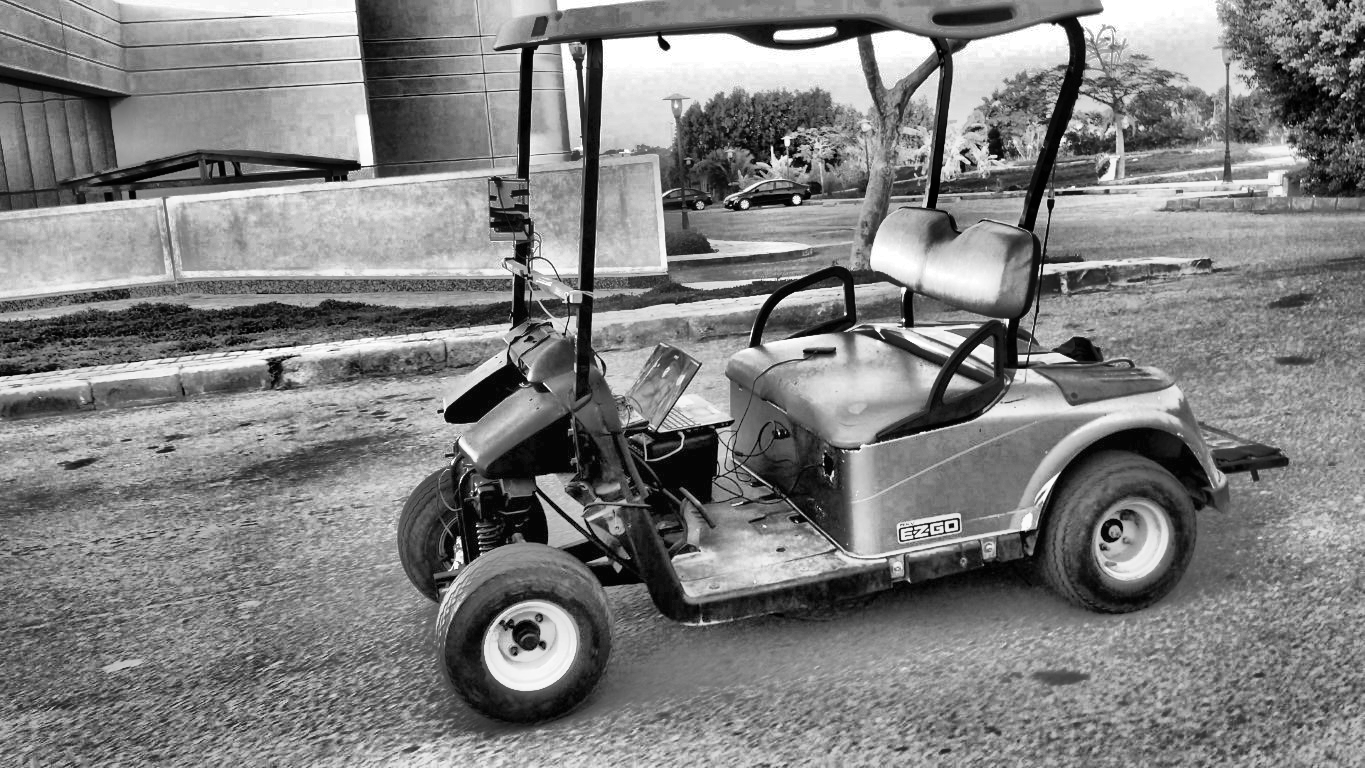

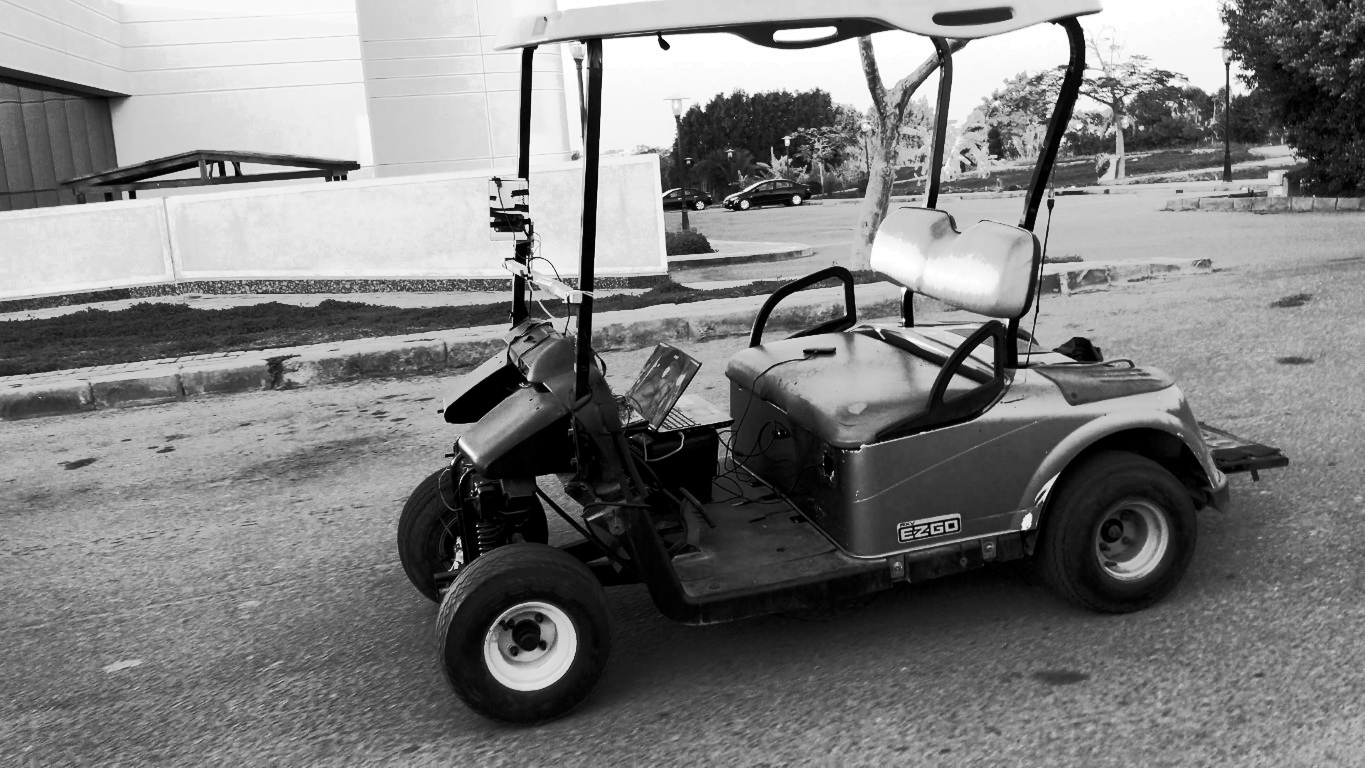

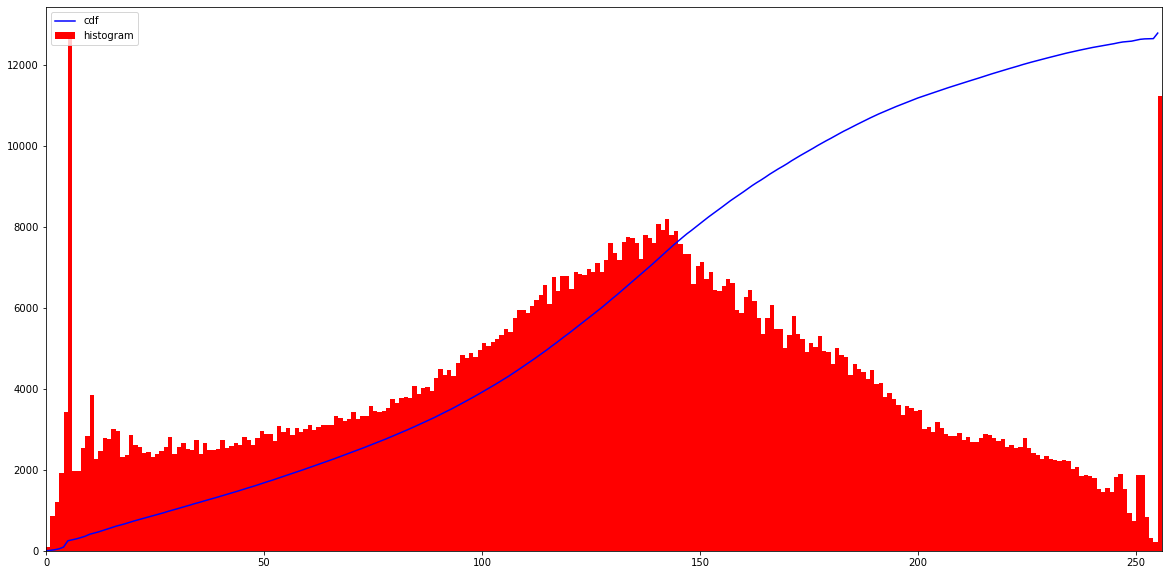

In [18]:
clahe = cv2.createCLAHE(clipLimit = 5)
clahe_img = clahe.apply(img)
hist,bins = np.histogram(clahe_img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(20, 10))
plt.plot(cdf_normalized, color = 'b')
plt.hist(clahe_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left') 

SHOW(clahe_img)
SHOW(histeq)
